## Einsatz des Naive Bayes Classifier zur Extraktion der Top 10 Keywords pro Sterne-Klasse

Also Basis des Notebooks wurde folgendes Videotutorial genommen: https://www.youtube.com/watch?v=5xDE06RRMFk

In [377]:
import json
import pandas as pd
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile, f_classif
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [378]:
with open('config.json') as json_data_file:
    config = json.load(json_data_file)

In [379]:
data = pd.read_csv("./Data_filtered/reviews_Patio_Lawn_and_Garden.csv", sep=";")
data.head(10)

,review,rating,products
0,"['good', 'usa', 'company', 'stands', 'behind',...",4.0,B00KS0F4FI
1,"['high', 'quality', 'eight', 'ply', 'hose', 'g...",5.0,B00KS0F4FI
2,"['probably', 'one', 'best', 'hoses', 'ever', '...",4.0,B00KS0F4FI
3,"['probably', 'bought', 'something', 'bit', 'fl...",5.0,B00KS0F4FI
4,"['bought', 'three', '58inch', 'flexogen', 'hos...",5.0,B00KS0F4FI
5,"['aqm', 'impressed', 'cost', 'quality', 'produ...",5.0,B00KS0F4FI
6,"['using', 'hose', 'never', 'go', 'back', 'smal...",5.0,B00KS0F4FI
7,"['one', 'tough', 'hose', 'thick', 'stiffthe', ...",5.0,B00KS0F4FI
8,"['buy', 'come', 'spring', 'holding', 'well', '...",5.0,B00KS0F4FI
9,"['far', 'good', 'really', 'time', 'test', 'hos...",4.0,B00KS0F4FI


In [380]:
# 1, 2, 3 = 0; 4 = 1; 5 = 2 (im config.json definiert)
data["rating"] = pd.cut(data["rating"], bins = config["label_three_num"]["bins"], labels = config["label_three_num"]["labels"])
data['rating'] = data['rating'].astype(float)
data.head(10)

,review,rating,products
0,"['good', 'usa', 'company', 'stands', 'behind',...",1.0,B00KS0F4FI
1,"['high', 'quality', 'eight', 'ply', 'hose', 'g...",2.0,B00KS0F4FI
2,"['probably', 'one', 'best', 'hoses', 'ever', '...",1.0,B00KS0F4FI
3,"['probably', 'bought', 'something', 'bit', 'fl...",2.0,B00KS0F4FI
4,"['bought', 'three', '58inch', 'flexogen', 'hos...",2.0,B00KS0F4FI
5,"['aqm', 'impressed', 'cost', 'quality', 'produ...",2.0,B00KS0F4FI
6,"['using', 'hose', 'never', 'go', 'back', 'smal...",2.0,B00KS0F4FI
7,"['one', 'tough', 'hose', 'thick', 'stiffthe', ...",2.0,B00KS0F4FI
8,"['buy', 'come', 'spring', 'holding', 'well', '...",2.0,B00KS0F4FI
9,"['far', 'good', 'really', 'time', 'test', 'hos...",1.0,B00KS0F4FI


In [381]:
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['rating'], test_size=0.2)

pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
                     ('chi', SelectKBest(f_classif, k=10000)), 
                     ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False))])
# ('chi', SelectPercentile(percentile=10)), # wählt 10% mit dem Höchsten vorkommen
# ('clf', LinearSVC(C=1.0, penalty= "l1", max_iter=3000, dual=False))]) # Linear SVM Classifier aus dem Tutorium

In [382]:
model = pipeline.fit(X_train, y_train)

vectorizer = model.named_steps['vect']
chi = model.named_steps['chi']
clf = model.named_steps['clf']

feature_names = vectorizer.get_feature_names()
feature_names = [feature_names[i] for i in chi.get_support(indices=True)]
feature_names = np.asarray(feature_names)

target_names = ['0', '1', '2']
print("top 10 keywords per class:")
for i, label in enumerate(target_names):
    top10 = np.argsort(clf.coef_[i])[-10:]
    print("%s: %s" % (label, " ".join(feature_names[top10])))

print("accuracy score: " + str(model.score(X_test, y_test)))

print(model.predict(['that was an awesome place. Great food!']))

top 10 keywords per class:
0: traps mice water mouse feeder work like use product trap
1: great works used little feeder product easy good use like
2: grill love product works good used like easy use great
accuracy score: 0.5532956685499059
[2.]


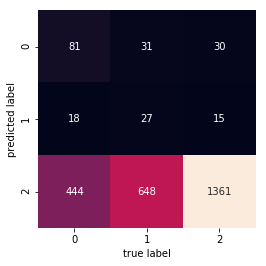

In [383]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = model.predict(X_test)
target_names = ['0', '1', '2']
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [384]:
print(model.predict(['great']))

[2.]


In [385]:
print(model.predict(['bad']))

[2.]
